<a href="https://colab.research.google.com/github/ahmerayaz2000/CS351-AI-lab-2022070/blob/main/ahmerayaz_2022070_CS35L_lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Available cities: ['Islamabad', 'Karachi', 'Lahore', 'Quetta', 'Peshawar', 'Rawalpindi', 'Multan', 'Faisalabad', 'Sialkot', 'Gujranwala']
Enter the starting city: Karachi
Enter the destination city: Lahore
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 587104379731968.0000   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587104178405376.0000
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587103507316736.0000 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587101561159680.0000 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587097333301248.0000 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587089951326208.0000 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587078475710464.0000
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587061765603328.0000 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587038948589568.0000
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587009353580544.

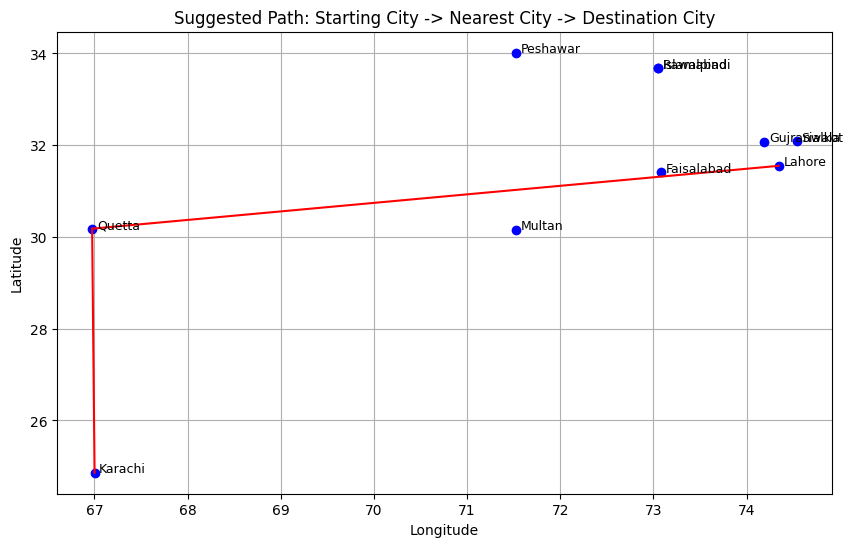

In [6]:
import numpy as np
import random
import tensorflow as tf
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt
from itertools import permutations

# Hardcoded cities, coordinates (latitude, longitude), and additional data
city_names = [
    "Islamabad", "Karachi", "Lahore", "Quetta", "Peshawar",
    "Rawalpindi", "Multan", "Faisalabad", "Sialkot", "Gujranwala"
]

cities_coords = [
    (33.6844, 73.0479),  # Islamabad
    (24.8607, 67.0011),  # Karachi
    (31.5497, 74.3436),  # Lahore
    (30.1798, 66.9750),  # Quetta
    (34.0151, 71.5249),  # Peshawar
    (33.6844, 73.0479),  # Rawalpindi
    (30.1575, 71.5249),  # Multan
    (31.4167, 73.0782),  # Faisalabad
    (32.0836, 74.5375),  # Sialkot
    (32.0783, 74.1892)   # Gujranwala
]

# Hypothetical data for weather and population (these would normally come from real APIs)
city_weather = {
    "Islamabad": "Sunny",
    "Karachi": "Cloudy",
    "Lahore": "Rainy",
    "Quetta": "Clear",
    "Peshawar": "Windy",
    "Rawalpindi": "Foggy",
    "Multan": "Hot",
    "Faisalabad": "Clear",
    "Sialkot": "Sunny",
    "Gujranwala": "Cloudy"
}

city_population = {
    "Islamabad": 1070000,
    "Karachi": 15700000,
    "Lahore": 12188000,
    "Quetta": 1030000,
    "Peshawar": 2000000,
    "Rawalpindi": 2100000,
    "Multan": 1830000,
    "Faisalabad": 3200000,
    "Sialkot": 650000,
    "Gujranwala": 2200000
}

# Haversine formula to calculate distance between two cities based on latitudes and longitudes
def haversine(city1, city2):
    lat1, lon1 = city1
    lat2, lon2 = city2

    R = 6371  # Earth radius in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)

    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c  # Distance in kilometers
    return distance

# Calculate the total distance of a given route
def total_route_distance(route, cities_coords):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += haversine(cities_coords[route[i]], cities_coords[route[i + 1]])
    total_distance += haversine(cities_coords[route[-1]], cities_coords[route[0]])  # Closing the loop
    return total_distance

# Generate data for training (distances between cities and additional info)
def generate_training_data(cities_coords, city_names, city_weather, city_population):
    num_cities = len(city_names)
    data = []
    labels = []

    # Generate random routes (permutations of city indices)
    for _ in range(1000):  # Number of random routes to generate
        route = random.sample(range(num_cities), num_cities)
        total_distance = total_route_distance(route, cities_coords)
        total_population = 0
        weather_sum = 0

        # Calculate the population and weather data for this route
        for i in range(num_cities):
            total_population += city_population[city_names[route[i]]]
            weather_sum += 1 if city_weather[city_names[route[i]]] == "Sunny" else 0

        # Assume constant speed of 60 km/h for travel time estimation
        total_travel_time = total_distance / 60  # In hours

        data.append(np.array(route))  # Use city indices as input
        labels.append([total_travel_time, weather_sum / num_cities, total_population])  # Travel time, Weather index, Population

    return np.array(data), np.array(labels)

# Find the nearest city to a given city (excluding the destination city)
def find_nearest_city(start_idx, cities_coords, exclude_idx=None):
    min_distance = float('inf')
    nearest_city_idx = None
    for idx, coord in enumerate(cities_coords):
        if idx != start_idx and (exclude_idx is None or idx != exclude_idx):
            distance = haversine(cities_coords[start_idx], coord)
            if distance < min_distance:
                min_distance = distance
                nearest_city_idx = idx
    return nearest_city_idx

# Ask the user for the starting and destination cities
def get_user_cities():
    print("Available cities:", city_names)

    start_city = input("Enter the starting city: ")
    end_city = input("Enter the destination city: ")

    if start_city not in city_names or end_city not in city_names:
        print("Please enter valid city names from the available list.")
        return None, None

    start_coords = cities_coords[city_names.index(start_city)]
    end_coords = cities_coords[city_names.index(end_city)]

    return start_coords, end_coords, start_city, end_city

# Run the neural network to predict useful data
def run_nn_for_tsp():
    # Ask the user for the starting and destination cities
    start_coords, end_coords, start_city, end_city = get_user_cities()

    if start_coords is None or end_coords is None:
        return

    # Prepare training data based on the full city set
    num_cities = len(city_names)
    input_data, labels = generate_training_data(cities_coords, city_names, city_weather, city_population)

    # Normalize input data (scale the input)
    input_data = input_data / num_cities

    # Create and train the neural network
    model = create_nn_model(input_size=num_cities)
    model.fit(input_data, labels, epochs=10, batch_size=32)

    # Get the index of the starting and destination cities
    start_idx = city_names.index(start_city)
    end_idx = city_names.index(end_city)

    # Suggest nearest city if the user has no travel history
    nearest_city_idx = find_nearest_city(start_idx, cities_coords, exclude_idx=end_idx)
    nearest_city = city_names[nearest_city_idx]
    print(f"Suggested nearest city from {start_city} is {nearest_city}.")

    # Generate all possible routes and find the shortest one
    all_routes = list(permutations(range(num_cities), num_cities))
    shortest_route = None
    shortest_distance = float('inf')

    for route in all_routes:
        # Calculate the total distance for each route
        route_distance = total_route_distance(route, cities_coords)
        if route_distance < shortest_distance:
            shortest_distance = route_distance
            shortest_route = route

    print(f"Shortest route (in terms of distance) from {start_city} to {end_city}:")
    print([city_names[idx] for idx in shortest_route])

    # Visualize the shortest route and the nearest city path
    visualize_trip(start_idx, nearest_city_idx, end_idx, cities_coords, city_names)

# Visualize the route for the new trip (starting city -> nearest city -> destination city)
def visualize_trip(start_idx, nearest_city_idx, end_idx, cities_coords, city_names):
    route = [start_idx, nearest_city_idx, end_idx]

    # Plot cities as points
    plt.figure(figsize=(10, 6))
    plt.title("Suggested Path: Starting City -> Nearest City -> Destination City")

    for i, city_name in enumerate(city_names):
        lat, lon = cities_coords[i]
        plt.plot(lon, lat, 'bo')  # blue circles for cities
        plt.text(lon + 0.05, lat, city_name, fontsize=9)  # Label each city

    # Plot the route (connect cities)
    for i in range(len(route) - 1):
        city1_idx = route[i]
        city2_idx = route[i + 1]
        city1 = cities_coords[city1_idx]
        city2 = cities_coords[city2_idx]
        plt.plot([city1[1], city2[1]], [city1[0], city2[0]], 'r-')  # red line for the path
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

# Run the TSP solution with Neural Network
run_nn_for_tsp()

